In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
data = pd.read_csv("DATABASE.csv", sep = ';', decimal=',')
data = data.rename(columns={"day/month": "Date"})

In [8]:
def pars(data, colums):
    data['Date'] = pd.to_datetime(data["Date"] + ".2019")
    data['Time'] = pd.to_datetime(data['Time']).dt.strftime('%H:%M')
    data['Pressure'] = data['Pressure'].astype(float)
    for c in colums:
        data[c] = data[c].map(lambda x: x.strip(' mph%'))
        data[c] =data[c].astype(int)
    data.set_index('Date')

In [9]:
colums = ['Wind Speed', 'Wind Gust','Humidity']
pars(data, colums)
data


,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Precip Accum,Condition
0,2019-07-16,00:20,72,57,60,VAR,1,0,29.6,0,0,Fair
1,2019-07-16,00:50,73,57,57,W,3,0,29.6,0,0,Fair
2,2019-07-16,01:20,75,57,53,CALM,0,0,29.6,0,0,Fair
3,2019-07-16,01:50,72,57,60,CALM,0,0,29.6,0,0,Fair
4,2019-07-16,02:20,72,57,60,CALM,0,0,29.5,0,0,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
1375,2019-08-13,21:50,77,50,39,VAR,2,0,29.6,0,0,Fair
1376,2019-08-13,22:20,77,48,36,VAR,1,0,29.6,0,0,Fair
1377,2019-08-13,22:50,73,50,44,N,13,0,29.6,0,0,Fair
1378,2019-08-13,23:20,73,50,44,N,7,0,29.6,0,0,Fair


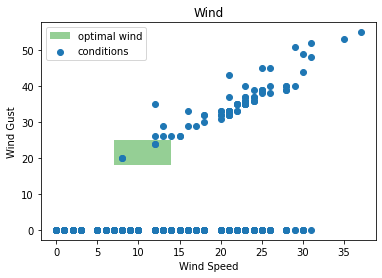

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Wind Gust')
ax.set_title('Wind')
ax.broken_barh([(7,7),(18,0)],(18,7), facecolors = 'tab:green', alpha = 0.5, label = 'optimal wind')
ax.scatter(data['Wind Speed'], data['Wind Gust'], label = 'conditions')
ax.legend()

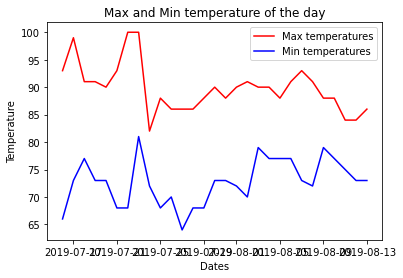

In [11]:
t_max = data.groupby('Date').agg({'Temperature':'max'})
t_min = data.groupby('Date').agg({'Temperature':'min'})
col = [t_max, t_min]
fig, ax = plt.subplots()
ax.plot(t_max, color = 'red', label = 'Max temperatures')
ax.plot(t_min, color = 'blue', label = 'Min temperatures')
ax.set_title('Max and Min temperature of the day')
ax.set_xlabel('Dates')
ax.set_ylabel('Temperature')
ax.legend()

<AxesSubplot:xlabel='Date'>

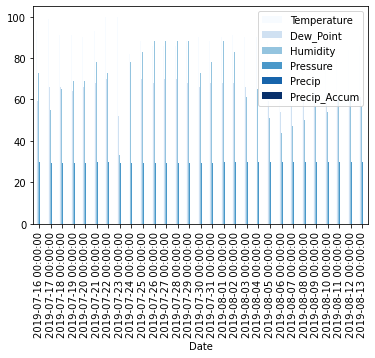

In [55]:
col2 = [data['Temperature'], data['Dew_Point'], data['Humidity'], data['Pressure'], data['Precip'], data['Precip_Accum']]
vol = data.groupby('Date').agg({'Temperature':'max', 'Dew_Point':'max', 'Humidity':'max', 'Pressure':'max', 'Precip':'max', 'Precip_Accum':'min'})
vol.plot.bar(colormap='Blues')


Text(0.5, 0, 'Date')

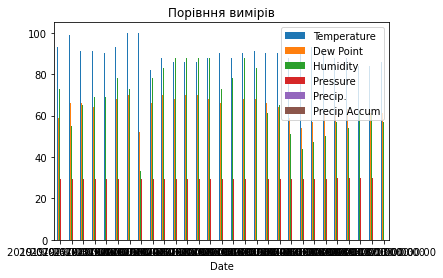

In [13]:
gr = data.groupby('Date').agg({'Temperature':'max','Dew Point':'max','Humidity':'max','Pressure':'max','Precip.':'max','Precip Accum':'max'})
ax = gr.plot.bar(rot=0)
ax.set_title('Порівння вимірів')
ax.set_xlabel('Date')

Text(0, 0.5, 'frequency')

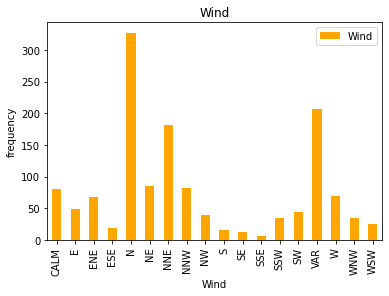

In [14]:
w = data.groupby('Wind').agg({'Wind':'count'})
ax = w.plot.bar(color = 'orange')
ax.set_title('Wind')
ax.set_ylabel('frequency')

<AxesSubplot:ylabel='Condition'>

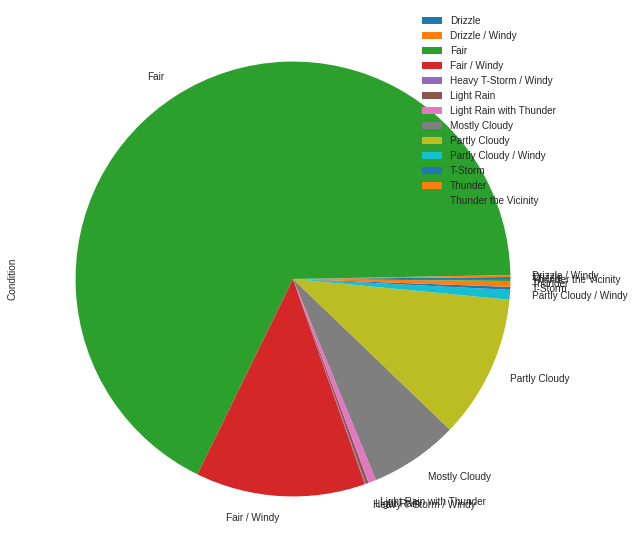

In [77]:
cond = data.groupby('Condition').agg({'Condition':'count'})
cond.plot.pie(y = 'Condition', figsize = (10,10))

In [16]:
def oun():
    print('Графік яких даних вивести?\n'
          '1 - Temperature\n'
          '2 - Dew Point\n'
          '3 - Humidity\n'
          '4 - Pressure\n'
          '5 - Precip.\n'
          '6 - Precip Accum'
          '7 - Wind Speed\n'
          '8 - Wind Gust')
    t = int(input())
    print("What values find?\n Enter 'min', 'max' or 'mean'")
    a = input()
    temp = 'Temperature'
    if t == 1:
        temp = 'Temperature'
    elif t == 2:
        temp = 'Dew Point'
    elif t == 3:
        temp = 'Humidity'
    elif t == 4:
        temp = 'Pressure'
    elif t == 5:
        temp = 'Precip.'
    elif t == 6:
        temp = 'Precip Accum'
    elif t == 7:
        temp = 'Wind Speed'
    elif t == 8:
        temp = 'Wind Gust'
    vol = data.groupby('Date').agg({temp:a})
    fig, ax = plt.subplots()
    ax.plot(vol, color = 'red')

In [17]:
def dia_scatter(data, data1, data2):
    fig, ax = plt.subplots()
    ax.set_xlabel(data1)
    ax.set_ylabel(data2)
    ax.set_title('Точкова діаграма\n' + data1 + ' - ' + data2)
    ax.scatter(data[data1], data[data2])
    ax.legend()
    return ax

No handles with labels found to put in legend.


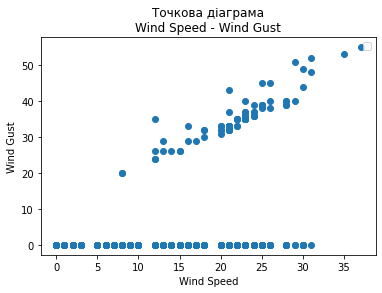

In [18]:
dia_scatter(data, 'Wind Speed', 'Wind Gust')
plt.show()

In [19]:
data['Dew Point']

0       57
1       57
2       57
3       57
4       57
        ..
1375    50
1376    48
1377    50
1378    50
1379    50
Name: Dew Point, Length: 1380, dtype: int64

In [20]:
data = data.rename(columns={"day/month": "Date", 'Dew Point': 'Dew_Point', 'Wind Speed':'Wind_Speed', 'Wind Gust':'Wind_Gust', 'Precip Accum':'Precip_Accum', 'Precip.':'Precip'})
data

,Date,Time,Temperature,Dew_Point,Humidity,Wind,Wind_Speed,Wind_Gust,Pressure,Precip,Precip_Accum,Condition
0,2019-07-16,00:20,72,57,60,VAR,1,0,29.6,0,0,Fair
1,2019-07-16,00:50,73,57,57,W,3,0,29.6,0,0,Fair
2,2019-07-16,01:20,75,57,53,CALM,0,0,29.6,0,0,Fair
3,2019-07-16,01:50,72,57,60,CALM,0,0,29.6,0,0,Fair
4,2019-07-16,02:20,72,57,60,CALM,0,0,29.5,0,0,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
1375,2019-08-13,21:50,77,50,39,VAR,2,0,29.6,0,0,Fair
1376,2019-08-13,22:20,77,48,36,VAR,1,0,29.6,0,0,Fair
1377,2019-08-13,22:50,73,50,44,N,13,0,29.6,0,0,Fair
1378,2019-08-13,23:20,73,50,44,N,7,0,29.6,0,0,Fair


In [21]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
	         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()



In [24]:
data.head(5)

,Date,Time,Temperature,Dew_Point,Humidity,Wind,Wind_Speed,Wind_Gust,Pressure,Precip,Precip_Accum,Condition
0,2019-07-16,00:20,72,57,60,VAR,1,0,29.6,0,0,Fair
1,2019-07-16,00:50,73,57,57,W,3,0,29.6,0,0,Fair
2,2019-07-16,01:20,75,57,53,CALM,0,0,29.6,0,0,Fair
3,2019-07-16,01:50,72,57,60,CALM,0,0,29.6,0,0,Fair
4,2019-07-16,02:20,72,57,60,CALM,0,0,29.5,0,0,Fair


<AxesSubplot:xlabel='Wind_Speed', ylabel='Wind_Gust'>

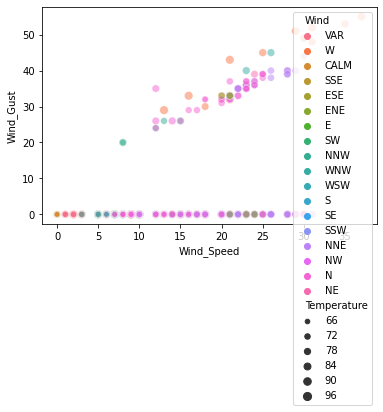

In [42]:
sns.scatterplot(x = data['Wind_Speed'], y = data['Wind_Gust'], alpha = 0.5, hue = data['Wind'], size = data['Temperature'])

In [45]:
if data['Wind'].dtype == object:
    print('Yes')

Yes


In [54]:
col2 = ['Temperature','Dew_Point', 'Humidity','Pressure','Precip', 'Precip_Accum']
vol = data.groupby('Date').agg(dict.fromkeys(col2, 'min'))

#gr = data.groupby('Date').agg({'Temperature':'max','Dew Point':'max','Humidity':'max','Pressure':'max','Precip.':'max','Precip Accum':'max'})
vol

,Temperature,Dew_Point,Humidity,Pressure,Precip,Precip_Accum
Date,,,,,,
2019-07-16,66,48,23,29.5,0,0
2019-07-17,73,52,24,29.4,0,0
2019-07-18,77,46,24,29.3,0,0
2019-07-19,73,48,24,29.4,0,0
2019-07-20,73,55,35,29.5,0,0
2019-07-21,68,55,29,29.5,0,0
2019-07-22,68,48,21,29.4,0,0
2019-07-23,81,41,13,29.3,0,0
2019-07-24,72,52,35,29.3,0,0


In [51]:
y = [x for x in range(5)]
print(y)


[0, 1, 2, 3, 4]


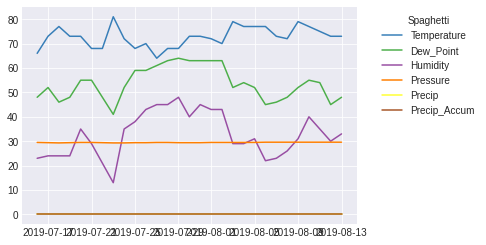

In [76]:
col2 = ['Temperature','Dew_Point', 'Humidity','Pressure','Precip', 'Precip_Accum']
vol = data.groupby('Date').agg(dict.fromkeys(col2, 'min'))
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
num = 0
for column in vol:
    num+=1
    plt.plot(vol.index, vol[column], marker = '', color = palette(num), label = column)
plt.legend(title='Spaghetti', bbox_to_anchor=(1.05, 1), loc='upper left')

(array([276.,  87.,  87.,  49., 126.,  59.,  16.,  48., 220., 412.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

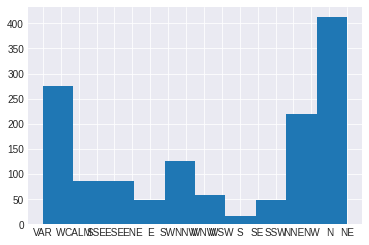

In [80]:
plt.hist(data['Wind'])

<AxesSubplot:>

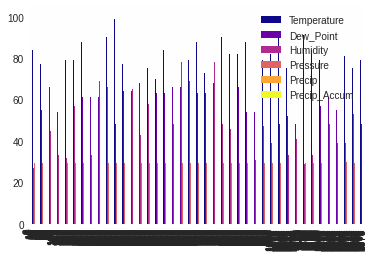

In [82]:
col2 = ['Temperature','Dew_Point', 'Humidity','Pressure','Precip', 'Precip_Accum']
vol = data[col2]
vol.plot.bar(colormap = 'plasma')


